<a href="https://colab.research.google.com/github/CaioPereira51/analitics-com-python/blob/main/CaioPereira_lista11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>FUMEC - Analytics com Python</font>
## **Lista de exercícios 11 - Classificação e seleção de modelos**

<br>**ATENÇÃO:** para salvar o arquivo .ipynb do notebook, faça da seguinte forma:

* **Google Colaboratory**: opção do menu "Arquivo --> Fazer download --> Fazer o download do .ipynb"

* Salve o arquivo com o nome "**SeuNome_lista11.ipynb**"

<br>



# **Classificação**


Analisar o risco de ataques cardíacos usando o dataset [heart.csv](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).


### **Importar as bibliotecas necessárias**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### **01) Carregar os dados do dataset `heart.csv`**

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1zNKaurNqUtz9toO9QVMs6ESZ0DF5fhKx')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **02) Realizar a análise exploratória dos dados (use diversas análises)**


Fazer diversas análises exploratórias

In [10]:
df.chol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

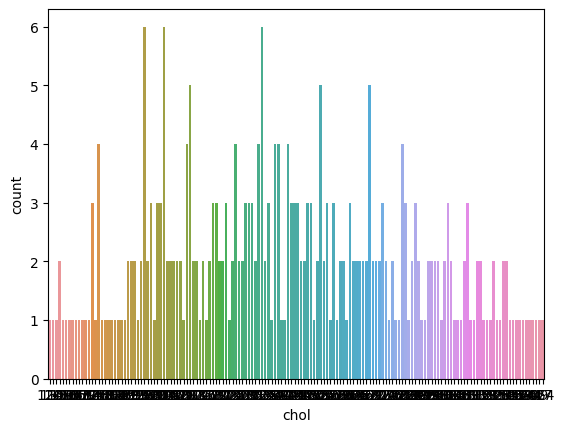

In [11]:
sns.countplot(x='chol', data=df);

Ver a correlação entre os atributos

Ver a distribuiçãos dos valores da coluna **output** (alvo da classificação)

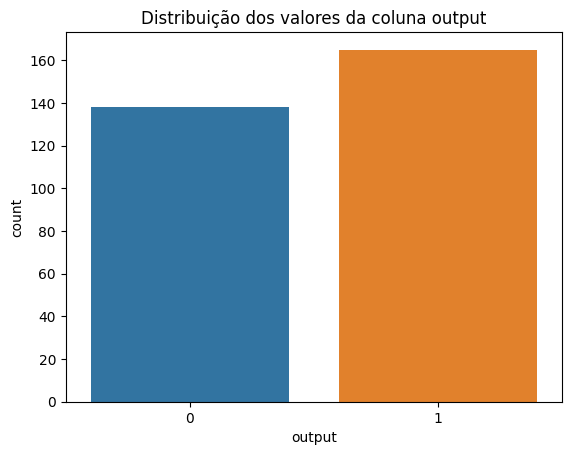

In [12]:
sns.countplot(x='output', data=df);
plt.title('Distribuição dos valores da coluna output');

Verificar existência de dados nulos

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### **03) Preparar os dados, gerando os conjuntos de dados para treino e teste**


Separar as variáveis independentes X da variável alvo y (o atributo **`output`** será o alvo da classificação)

In [15]:
# separar as variáveis independentes da variável alvo
X = df.drop(['output'], axis=1)
y = df['output']

Normalizar as variáveis numéricas usando MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X.values)
X_norm[0]

array([0.70833333, 1.        , 1.        , 0.48113208, 0.24429224,
       1.        , 0.        , 0.60305344, 0.        , 0.37096774,
       0.        , 0.        , 0.33333333])

Separar os conjuntos de treino e teste

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
# conferindo a separação

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


### **04) Treinamento e avaliação**

Usar validação cruzada para escolher o modelo a ser usado

In [20]:
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rs = 42
classifiers = [
    ['RandomForest', RandomForestClassifier(random_state=rs)],
    ['Árvore de decisão',DecisionTreeClassifier(random_state=rs)],
    ['Regressão Logística', LogisticRegression(random_state=rs)],
    ['kNN', KNeighborsClassifier()],
    ['SVM',SVC(random_state=rs)],
    ['Boosting',GradientBoostingClassifier(random_state=rs)],
]

results = []
for m in classifiers :
    score = cross_val_score(m[1], X_train, np.ravel(y_train), cv=5)
    results.append([ m[0], m[1], [ round(x,3) for x in score ], score.mean() ])

df_results = pd.DataFrame(results, columns=['Método', 'Modelo', 'Acurácia por fold', 'Acurácia média'])
df_results


,Método,Modelo,Acurácia por fold,Acurácia média
0,RandomForest,RandomForestClassifier(random_state=42),"[0.767, 0.767, 0.905, 0.833, 0.857]",0.826024
1,Árvore de decisão,DecisionTreeClassifier(random_state=42),"[0.767, 0.698, 0.81, 0.762, 0.81]",0.769214
2,Regressão Logística,LogisticRegression(random_state=42),"[0.791, 0.767, 0.881, 0.833, 0.929]",0.840199
3,kNN,KNeighborsClassifier(),"[0.791, 0.767, 0.833, 0.833, 0.857]",0.816390
4,SVM,SVC(random_state=42),"[0.791, 0.837, 0.929, 0.857, 0.881]",0.858915
5,Boosting,GradientBoostingClassifier(random_state=42),"[0.814, 0.744, 0.833, 0.738, 0.833]",0.792580


Escolhendo o melhor classificador

In [29]:
best = df_results.sort_values(by=['Acurácia média'], ascending=False).iloc[0]['Modelo']

Valiar os hiperparâmetros para o melhro modelo, no caso **`KNeighborsClassifier()`**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier #kNN

model = KNeighborsClassifier()

param_grid = {
   'n_neighbors': np.arange(2,8),
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean','manhattan','chebyshev','minkowski']
}

# continue o codigo aqui

grid = GridSearchCV(estimator=best,
                           param_grid=param_grid,
                           scoring='accuracy',
                           n_jobs=-1, #3 ou -1
                           cv=5,
                           verbose=1)

grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


ValueError: ignored

Treina o modelo final com os melhores parâmetros

Avaliando os resultados

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# ver acurácia geral


Mostrar a matriz de confusão

In [ ]:
#realiza o plot da matriz de confusão

